<a href="https://colab.research.google.com/github/ahmadrakha1/Biomarkers-of-Recent-Cannabis-Use/blob/main/ICH_Sentiment__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Islamic Center of Hawthorne Sentiment Analysis
Ahmad Rakha


In [6]:
import pandas as pd

In [7]:
ich = pd.read_csv('ich.csv')
print(ich.head())

                                              OA1nbd
0  Love this place. They are all very nice and pl...
1  Cheap unless you are Arab or Desi, revert Blac...
2  Of course great place. One of God's houses. Al...
3                   It’s good place people are great
4                  Great communityI love this masjid


#Data Wrangling



In [8]:
#rename the column title
ich.columns = ['reviews']
print(ich.head())



                                             reviews
0  Love this place. They are all very nice and pl...
1  Cheap unless you are Arab or Desi, revert Blac...
2  Of course great place. One of God's houses. Al...
3                   It’s good place people are great
4                  Great communityI love this masjid


In [9]:
# Clean the text
import re

def clean(text):
# Removes all special characters and numericals leaving the alphabets
  text = re.sub('[^A-Za-z]+',' ', str(text))
  return text

ich['Cleaned Reviews'] = ich['reviews'].apply(clean)
ich.head()


,reviews,Cleaned Reviews
0,Love this place. They are all very nice and pl...,Love this place They are all very nice and ple...
1,"Cheap unless you are Arab or Desi, revert Blac...",Cheap unless you are Arab or Desi revert Black...
2,Of course great place. One of God's houses. Al...,Of course great place One of God s houses Alla...
3,It’s good place people are great,It s good place people are great
4,Great communityI love this masjid,Great communityI love this masjid


##Tokenization, Stopwords Removal, and POS Tagging

1. Tokenization refers to the process of converting a sequence of text into smaller parts or tokens in order to allow the machine to more easily understand human language.

2. Stopwords refer to the most commonly used words in a given language. Examples of english stopwords are "the", "a", "is", "are", etc. It is common practice in Natural Language Processing to remove stopwords because they don't provide that much information

3. Part-of-speech (POS) tagging refers to the process of labelling words in a sentence with their corresponding POS tag (word, tag). POS is the grammatical category that a word belongs to, such as "noun", "verb", "adjective" etc. The goal of POS tagging is to preserve the context and set us up for lemmatization

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet


nltk.download('punkt', force=True)
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# POS mapping
pos_dict = {'J': wordnet.ADJ, 'V': wordnet.VERB, 'N': wordnet.NOUN, 'R': wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

# Apply the function
ich['Pos_tagged'] = ich['Cleaned Reviews'].apply(token_stop_pos)
ich.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,Pos_tagged
0,Love this place. They are all very nice and pl...,Love this place They are all very nice and ple...,"[(Love, v), (place, n), (nice, a), (pleasant, ..."
1,"Cheap unless you are Arab or Desi, revert Blac...",Cheap unless you are Arab or Desi revert Black...,"[(Cheap, n), (unless, None), (Arab, a), (Desi,..."
2,Of course great place. One of God's houses. Al...,Of course great place One of God s houses Alla...,"[(course, n), (great, a), (place, n), (One, No..."
3,It’s good place people are great,It s good place people are great,"[(good, a), (place, n), (people, n), (great, a)]"
4,Great communityI love this masjid,Great communityI love this masjid,"[(Great, n), (communityI, n), (love, n), (masj..."


##Lemmatization
Lemmatization refers to the process of reducing a word to its dictionary form. An example of this would be to treat "runs", "runs", "running", and "ran" as if were just "run". This allows text data to be more consistent and meaningful.

In [13]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

ich['Lemma'] = ich['Pos_tagged'].apply(lemmatize)
ich.head()

,reviews,Cleaned Reviews,Pos_tagged,Lemma
0,Love this place. They are all very nice and pl...,Love this place They are all very nice and ple...,"[(Love, v), (place, n), (nice, a), (pleasant, ...",Love place nice pleasant around
1,"Cheap unless you are Arab or Desi, revert Blac...",Cheap unless you are Arab or Desi revert Black...,"[(Cheap, n), (unless, None), (Arab, a), (Desi,...",Cheap unless Arab Desi revert Black people s...
2,Of course great place. One of God's houses. Al...,Of course great place One of God s houses Alla...,"[(course, n), (great, a), (place, n), (One, No...",course great place One God house Allah bless...
3,It’s good place people are great,It s good place people are great,"[(good, a), (place, n), (people, n), (great, a)]",good place people great
4,Great communityI love this masjid,Great communityI love this masjid,"[(Great, n), (communityI, n), (love, n), (masj...",Great communityI love masjid


In [14]:
ich[['reviews','Lemma']]

,reviews,Lemma
0,Love this place. They are all very nice and pl...,Love place nice pleasant around
1,"Cheap unless you are Arab or Desi, revert Blac...",Cheap unless Arab Desi revert Black people s...
2,Of course great place. One of God's houses. Al...,course great place One God house Allah bless...
3,It’s good place people are great,good place people great
4,Great communityI love this masjid,Great communityI love masjid
...,...,...
109,Me gustó que a mi hijo le gustara! Para ser la...,gust que mi hijo le gustara Para ser la prim...
110,ما شاء الله … مسجد رائع … امام طيب وعملي ومتسا...,
111,مسجد رائع والعاملين به متعاونين جدا خاصة محمد ...,
112,الحمد لا الله اللذ ارسل السلام في حاثورن و كرم...,Thank God Islam Hawthorne best Iman God bles...


##Sentiment Analysis Using Vader
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment analyzer that has been trained on social media  text data such as tweets, reviews, and comments. It takes into consideration things like word intensity, capitalization, degree modifiers, etc. Based on these criteria, it returns polarity scores like positive, negative, and neutral. The compound refers to the numerical value assigned to each review.

In [15]:
!pip install vaderSentiment

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

ich['Sentiment'] = ich['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
ich['Analysis'] = ich['Sentiment'].apply(vader_analysis)
ich.head()

,reviews,Cleaned Reviews,Pos_tagged,Lemma,Sentiment,Analysis
0,Love this place. They are all very nice and pl...,Love this place They are all very nice and ple...,"[(Love, v), (place, n), (nice, a), (pleasant, ...",Love place nice pleasant around,0.8834,Positive
1,"Cheap unless you are Arab or Desi, revert Blac...",Cheap unless you are Arab or Desi revert Black...,"[(Cheap, n), (unless, None), (Arab, a), (Desi,...",Cheap unless Arab Desi revert Black people s...,0.0000,Neutral
2,Of course great place. One of God's houses. Al...,Of course great place One of God s houses Alla...,"[(course, n), (great, a), (place, n), (One, No...",course great place One God house Allah bless...,0.8934,Positive
3,It’s good place people are great,It s good place people are great,"[(good, a), (place, n), (people, n), (great, a)]",good place people great,0.7906,Positive
4,Great communityI love this masjid,Great communityI love this masjid,"[(Great, n), (communityI, n), (love, n), (masj...",Great communityI love masjid,0.8519,Positive


In [17]:
vader_counts = ich['Analysis'].value_counts()
vader_counts

,count
Analysis,
Positive,77
Neutral,35
Negative,2


#Data Visualizations

([<matplotlib.patches.Wedge at 0x7fa452fb68d0>,
 [Text(-0.576040278360686, 0.9371113048651923, 'Positive'),
  Text(0.523542023696162, -0.9674211851226577, 'Neutral'),
  Text(1.347950021812578, -0.07436893636103034, 'Negative')],
 [Text(-0.3142037881967378, 0.5111516208355594, '67.5%'),
  Text(0.2855683765615429, -0.5276842827941769, '30.7%'),
  Text(0.8487092729931045, -0.046824885856945025, '1.8%')])

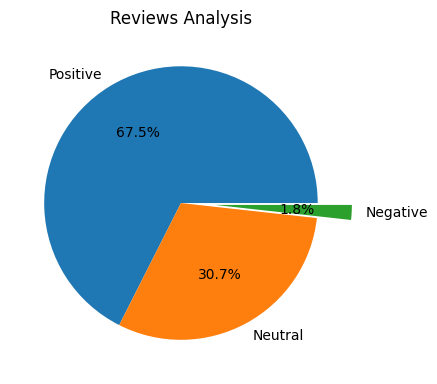

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [19]:
ich.to_csv("ich.csv")

#Wordcloud

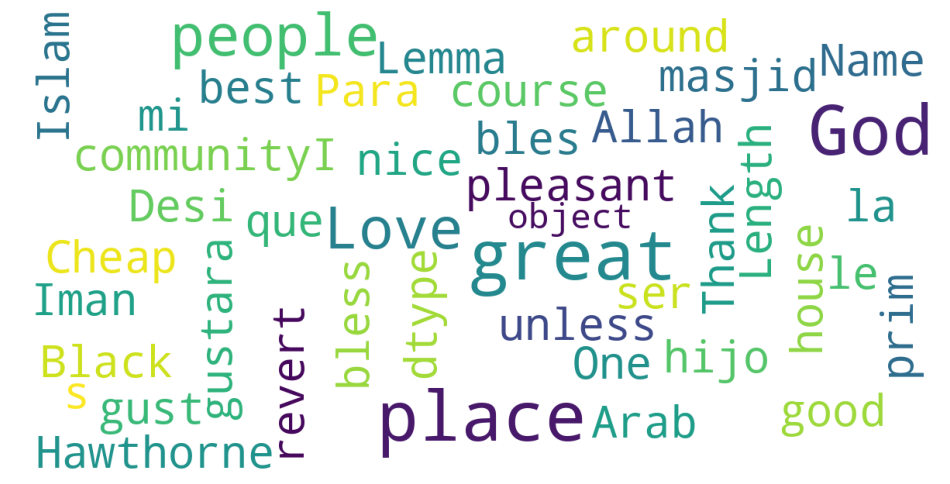

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(ich.Lemma)